In [143]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data_as_frame = pd.read_csv("input/2015_Air_quality.csv")

In [3]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218640 entries, 0 to 218639
Data columns (total 23 columns):
time          218640 non-null object
station       218640 non-null object
AMB_TEMP      200170 non-null object
CH4           95823 non-null object
CO            217311 non-null object
NMHC          95615 non-null object
NO            217228 non-null object
NO2           216681 non-null object
NOx           217229 non-null object
O3            199865 non-null object
PH_RAIN       34570 non-null object
PM10          215761 non-null object
PM2.5         215768 non-null object
RAINFALL      208979 non-null object
RAIN_COND     34570 non-null object
RH            200244 non-null object
SO2           217047 non-null object
THC           95824 non-null object
UVB           25974 non-null object
WD_HR         182712 non-null object
WIND_DIREC    182444 non-null object
WIND_SPEED    182475 non-null object
WS_HR         182270 non-null object
dtypes: object(23)
memory usage: 38.4+ MB


In [4]:
data_as_frame.head(10)

time  station AMB_TEMP  CH4    CO  NMHC   NO NO2 NOx  O3  ...   \
0  2015/01/01 00:00  Banqiao       16  2.1  0.79  0.14  1.2  16  17  37  ...    
1  2015/01/01 01:00  Banqiao       16  2.1   0.8  0.15  1.3  16  17  36  ...    
2  2015/01/01 02:00  Banqiao       16  2.1  0.71  0.13    1  13  14  38  ...    
3  2015/01/01 03:00  Banqiao       15    2  0.66  0.12  0.8  11  12  39  ...    
4  2015/01/01 04:00  Banqiao       15    2  0.53  0.11  0.6  10  11  38  ...    
5  2015/01/01 05:00  Banqiao       14    2   0.5  0.11  0.8  11  12  37  ...    
6  2015/01/01 06:00  Banqiao       14    2  0.57  0.14  1.4  18  19  29  ...    
7  2015/01/01 07:00  Banqiao       14    2  0.61  0.14  2.3  17  20  27  ...    
8  2015/01/01 08:00  Banqiao       14    2  0.59  0.13  2.9  15  18  29  ...    
9  2015/01/01 09:00  Banqiao       14    2   0.6  0.14  4.1  16  20  29  ...    

  RAINFALL RAIN_COND  RH  SO2  THC  UVB WD_HR WIND_DIREC WIND_SPEED WS_HR  
0       NR        NR  57   12  2.2    0    69         69        4.7   4.2  
1       NR        NR  57   11  2.2    0    67         65          4     4  
2       NR        NR  57    8  2.2    0    63         53        3.7   3.5  
3       NR        NR  58  6.5  2.2    0    63         63        4.1   3.3  
4       NR        NR  58  5.5  2.1    0    69         67          3   3.1  
5       NR        NR  57  5.7  2.1    0    68         62        2.9   3.3  
6       NR        NR  57  5.8  2.1    0    74         70        3.6   2.2  
7       NR        NR  56  6.5  2.2  0.2    66         72        3.1     3  
8       NR        NR  53  6.8  2.1  0.7    71         73        2.8   3.3  
9       NR        NR  50  5.9  2.1  1.6    73         68        3.6   3.2  

[10 rows x 23 columns]

In [5]:
data_as_frame.tail()

time    station AMB_TEMP  CH4    CO  NMHC   NO NO2 NOx  \
218635  2015/12/31 19:00  Zhongshan       18  1.9  1.05  0.25  6.1  39  45   
218636  2015/12/31 20:00  Zhongshan       18  1.9  0.96  0.22  5.3  37  42   
218637  2015/12/31 21:00  Zhongshan       18  1.9  0.82  0.19    4  28  32   
218638  2015/12/31 22:00  Zhongshan       18  1.9  0.88  0.21  4.5  32  37   
218639  2015/12/31 23:00  Zhongshan       18  1.9  0.84  0.19  4.7  29  34   

        O3  ...  RAINFALL RAIN_COND  RH  SO2  THC  UVB WD_HR WIND_DIREC  \
218635  35  ...        NR       NaN  67  4.5  2.2  NaN   112        121   
218636  31  ...        NR       NaN  69  3.7  2.1  NaN   115        113   
218637  34  ...        NR       NaN  70  3.5  2.1  NaN   113        109   
218638  27  ...        NR       NaN  71  4.6  2.1  NaN   116        112   
218639  29  ...        NR       NaN  68  3.4  2.1  NaN   112        106   

       WIND_SPEED WS_HR  
218635        3.2   2.3  
218636        2.7   2.3  
218637        2.6   2.6  
218638        2.4   2.2  
218639        2.9   2.3  

[5 rows x 23 columns]

In [6]:
data_as_frame.shape

(218640, 23)

In [7]:
data_as_frame.describe()

time  station AMB_TEMP    CH4      CO   NMHC      NO  \
count             218640   218640   200170  95823  217311  95615  217228   
unique             15912       25      250    121     901    494     766   
top     2015/10/11 00:00  Banqiao       26    1.9    0.23   0.09     1.2   
freq                  25     8760    14238  31078    4139   3248    6340   

           NO2     NOx      O3   ...   RAINFALL RAIN_COND      RH     SO2  \
count   216681  217229  199865   ...     208979     34570  200244  217047   
unique     607     910     505   ...        278       466     284     539   
top         11      11      32   ...         NR        NR      81     1.6   
freq      7893    6973    4250   ...     184630     30778    5990    7001   

          THC    UVB   WD_HR WIND_DIREC WIND_SPEED   WS_HR  
count   95824  25974  182712     182444     182475  182270  
unique    135    156     689        700        178     201  
top         2      0      84         84        1.2     0.8  
freq    17948  13516    1731       1657       6958    7270  

[4 rows x 23 columns]

In [8]:
data_as_frame.columns

Index(['time', 'station', 'AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx',
       'O3', 'PH_RAIN', 'PM10', 'PM2.5', 'RAINFALL', 'RAIN_COND', 'RH', 'SO2',
       'THC', 'UVB', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR'],
      dtype='object')

In [9]:
data_as_frame.isnull().values.any()

True

In [10]:
data_as_frame.isna().values.any()

True

In [11]:
data_as_frame.isna().sum()

time               0
station            0
AMB_TEMP       18470
CH4           122817
CO              1329
NMHC          123025
NO              1412
NO2             1959
NOx             1411
O3             18775
PH_RAIN       184070
PM10            2879
PM2.5           2872
RAINFALL        9661
RAIN_COND     184070
RH             18396
SO2             1593
THC           122816
UVB           192666
WD_HR          35928
WIND_DIREC     36196
WIND_SPEED     36165
WS_HR          36370
dtype: int64

In [12]:
len(data_as_frame)

218640

In [13]:
na_per = (data_as_frame.isna().sum() / len(data_as_frame)).sort_values(ascending=False)
na_per

UVB           0.881202
RAIN_COND     0.841886
PH_RAIN       0.841886
NMHC          0.562683
CH4           0.561732
THC           0.561727
WS_HR         0.166347
WIND_DIREC    0.165551
WIND_SPEED    0.165409
WD_HR         0.164325
O3            0.085872
AMB_TEMP      0.084477
RH            0.084138
RAINFALL      0.044187
PM10          0.013168
PM2.5         0.013136
NO2           0.008960
SO2           0.007286
NO            0.006458
NOx           0.006454
CO            0.006078
station       0.000000
time          0.000000
dtype: float64

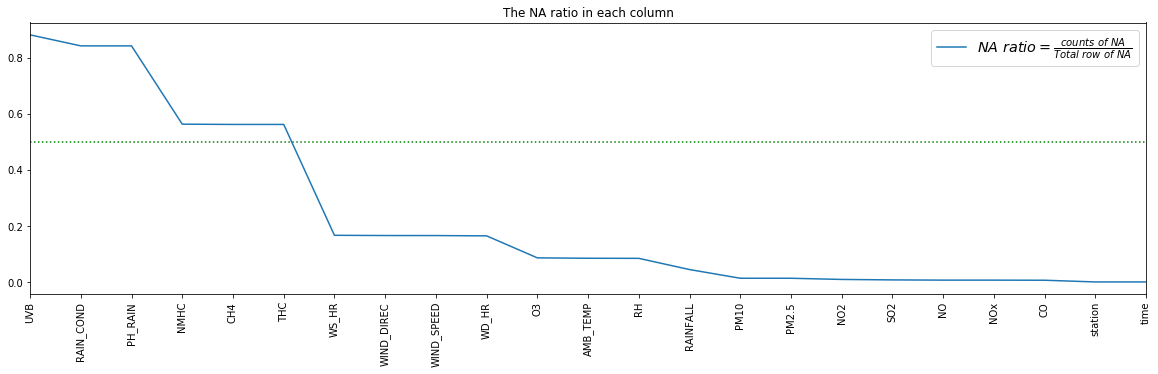

In [14]:
plt.figure(figsize=(20,5))
plt.title('The NA ratio in each column')
plt.xticks(rotation='vertical')
plt.plot([0,22],[0.5,0.5],'g:')
plt.plot(na_per.index,na_per.values,'-',label=r'$NA \ ratio = \frac{counts \ of \ NA}{Total \ row \ of \ NA}$')
plt.xlim(0,22)
_ = plt.legend(fontsize='x-large')

In [15]:
data_as_frame['UVB'].value_counts()

0       13516
0.1      1082
0.2       597
0.3       540
0.4       464
0.5       451
0.6       351
0.7       287
0.9       272
1         267
1.1       243
0.8       240
1.3       234
1.2       211
1.6       206
1.4       204
1.8       202
1.5       200
1.7       187
2         175
1.9       165
2.1       163
2.3       157
2.2       150
2.7       136
2.5       127
3.7       119
2.4       118
4         117
2.9       114
        ...  
0.3         1
3.9         1
2.1         1
0.5#        1
4.9#        1
0.6         1
3.9#        1
1.5         1
1.0         1
0.5         1
2#          1
2.5#        1
6.6#        1
0.6#        1
5.4#        1
0.2#        1
5.8#        1
3.3         1
2.3         1
3.7#        1
13          1
1#          1
4.8#        1
3.7         1
5.3#        1
3.3#        1
1.7         1
9.6#        1
1.1#        1
1.6         1
Name: UVB, Length: 156, dtype: int64

In [16]:
data_as_frame.drop(['UVB','RAIN_COND','PH_RAIN'],axis=1,inplace=True)

In [17]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218640 entries, 0 to 218639
Data columns (total 20 columns):
time          218640 non-null object
station       218640 non-null object
AMB_TEMP      200170 non-null object
CH4           95823 non-null object
CO            217311 non-null object
NMHC          95615 non-null object
NO            217228 non-null object
NO2           216681 non-null object
NOx           217229 non-null object
O3            199865 non-null object
PM10          215761 non-null object
PM2.5         215768 non-null object
RAINFALL      208979 non-null object
RH            200244 non-null object
SO2           217047 non-null object
THC           95824 non-null object
WD_HR         182712 non-null object
WIND_DIREC    182444 non-null object
WIND_SPEED    182475 non-null object
WS_HR         182270 non-null object
dtypes: object(20)
memory usage: 33.4+ MB


In [18]:
data_as_frame.nunique()

time          15912
station          25
AMB_TEMP        250
CH4             121
CO              901
NMHC            494
NO              766
NO2             607
NOx             910
O3              505
PM10            507
PM2.5           502
RAINFALL        278
RH              284
SO2             539
THC             135
WD_HR           689
WIND_DIREC      700
WIND_SPEED      178
WS_HR           201
dtype: int64

In [19]:
data_as_frame.head()

time  station AMB_TEMP  CH4    CO  NMHC   NO NO2 NOx  O3 PM10  \
0  2015/01/01 00:00  Banqiao       16  2.1  0.79  0.14  1.2  16  17  37  177   
1  2015/01/01 01:00  Banqiao       16  2.1   0.8  0.15  1.3  16  17  36  178   
2  2015/01/01 02:00  Banqiao       16  2.1  0.71  0.13    1  13  14  38  163   
3  2015/01/01 03:00  Banqiao       15    2  0.66  0.12  0.8  11  12  39  147   
4  2015/01/01 04:00  Banqiao       15    2  0.53  0.11  0.6  10  11  38  131   

  PM2.5 RAINFALL  RH  SO2  THC WD_HR WIND_DIREC WIND_SPEED WS_HR  
0   78x       NR  57   12  2.2    69         69        4.7   4.2  
1   77x       NR  57   11  2.2    67         65          4     4  
2   72x       NR  57    8  2.2    63         53        3.7   3.5  
3   65x       NR  58  6.5  2.2    63         63        4.1   3.3  
4   56x       NR  58  5.5  2.1    69         67          3   3.1

In [52]:
data_as_frame['station'].head()

0    0
1    0
2    0
3    0
4    0
Name: station, dtype: int64

In [21]:
data = data_as_frame.station.unique()
data_new = np.arange(len(data_as_frame.station.unique()))
data_new

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [22]:
len(data_new)

25

In [23]:
data_as_frame.station.replace(data, data_new, inplace=True)

In [24]:
data_as_frame.head()

time  station AMB_TEMP  CH4    CO  NMHC   NO NO2 NOx  O3 PM10  \
0  2015/01/01 00:00        0       16  2.1  0.79  0.14  1.2  16  17  37  177   
1  2015/01/01 01:00        0       16  2.1   0.8  0.15  1.3  16  17  36  178   
2  2015/01/01 02:00        0       16  2.1  0.71  0.13    1  13  14  38  163   
3  2015/01/01 03:00        0       15    2  0.66  0.12  0.8  11  12  39  147   
4  2015/01/01 04:00        0       15    2  0.53  0.11  0.6  10  11  38  131   

  PM2.5 RAINFALL  RH  SO2  THC WD_HR WIND_DIREC WIND_SPEED WS_HR  
0   78x       NR  57   12  2.2    69         69        4.7   4.2  
1   77x       NR  57   11  2.2    67         65          4     4  
2   72x       NR  57    8  2.2    63         53        3.7   3.5  
3   65x       NR  58  6.5  2.2    63         63        4.1   3.3  
4   56x       NR  58  5.5  2.1    69         67          3   3.1

In [25]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218640 entries, 0 to 218639
Data columns (total 20 columns):
time          218640 non-null object
station       218640 non-null int64
AMB_TEMP      200170 non-null object
CH4           95823 non-null object
CO            217311 non-null object
NMHC          95615 non-null object
NO            217228 non-null object
NO2           216681 non-null object
NOx           217229 non-null object
O3            199865 non-null object
PM10          215761 non-null object
PM2.5         215768 non-null object
RAINFALL      208979 non-null object
RH            200244 non-null object
SO2           217047 non-null object
THC           95824 non-null object
WD_HR         182712 non-null object
WIND_DIREC    182444 non-null object
WIND_SPEED    182475 non-null object
WS_HR         182270 non-null object
dtypes: int64(1), object(19)
memory usage: 33.4+ MB


In [26]:
data_as_frame[data_as_frame['CO'].isna()].head()

time  station AMB_TEMP  CH4   CO NMHC   NO  NO2  NOx   O3  \
466   2015/01/20 10:00        0       19  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1097  2015/02/15 17:00        0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1098  2015/02/15 18:00        0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1099  2015/02/15 19:00        0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1100  2015/02/15 20:00        0      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

     PM10 PM2.5 RAINFALL   RH  SO2  THC WD_HR WIND_DIREC WIND_SPEED WS_HR  
466    92    40       NR   55  NaN  NaN    67         68          4     3  
1097  NaN   NaN      NaN  NaN  NaN  NaN   NaN        NaN        NaN   NaN  
1098  NaN   NaN      NaN  NaN  NaN  NaN   NaN        NaN        NaN   NaN  
1099  NaN   NaN      NaN  NaN  NaN  NaN   NaN        NaN        NaN   NaN  
1100  NaN   NaN      NaN  NaN  NaN  NaN   NaN        NaN        NaN   NaN

In [36]:
#display na count row-wise.
data_as_frame.isna().sum(axis=1).value_counts().sort_index()

0      77392
1        319
2        541
3     102444
4        757
5       9219
6        401
7      17318
8        315
9        207
10      8456
11       103
12        68
13        14
14         1
15         5
16         7
17         3
18      1070
dtype: int64

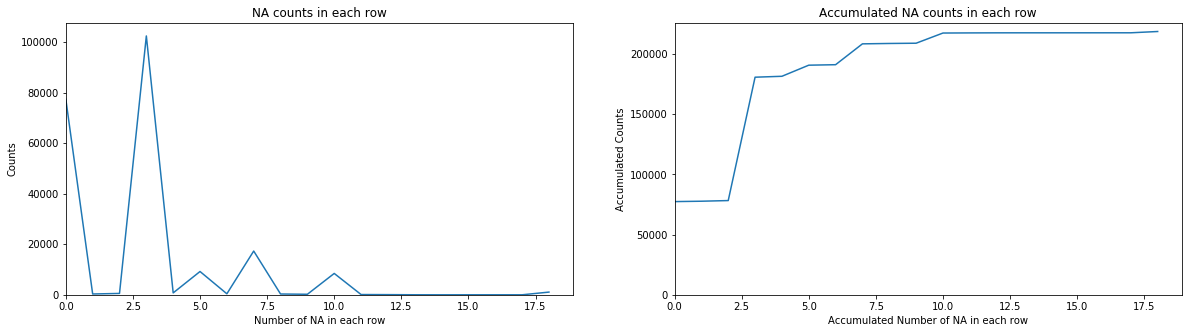

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('NA counts in each row')
plt.plot(data_as_frame.isna().sum(axis=1).value_counts().sort_index())
plt.xlabel('Number of NA in each row')
plt.ylabel('Counts')
plt.xlim(0)
plt.ylim(0)

plt.subplot(1,2,2)
plt.title('Accumulated NA counts in each row')
plt.plot(data_as_frame.isna().sum(axis=1).value_counts().sort_index().cumsum())
plt.xlabel('Accumulated Number of NA in each row')
plt.ylabel('Accumulated Counts')
plt.xlim(0)
_= plt.ylim(0)

In [37]:
data_as_frame = data_as_frame.dropna(thresh=17)

(0, 107550.25)

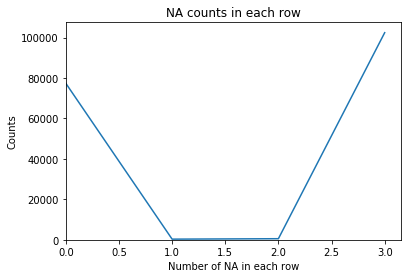

In [40]:
plt.title('NA counts in each row')
plt.plot(data_as_frame.isna().sum(axis=1).value_counts().sort_index())
plt.xlabel('Number of NA in each row')
plt.ylabel('Counts')
plt.xlim(0)
plt.ylim(0)

We got some annotation in the numeric column like, 1.7#,9.6#,2.3*,2.5x, we want to clean that.

In [41]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row =str(row)
            return float(row.replace('x','').replace('#','').replace('*',''))
    except TypeError:
        row =str(row)
        return float(row.replace('x','').replace('#','').replace('*',''))

In [42]:
data_as_frame['WS_HR'] = data_as_frame['WS_HR'].apply(numeric)
print(data_as_frame['WS_HR'].describe())
print('\nThe skewness:',data_as_frame['WS_HR'].skew())
print('Right skewed') if data_as_frame['WS_HR'].skew()>0 else print('Left skewed')

count    180695.000000
mean          1.986593
std           1.725249
min           0.000000
25%           0.800000
50%           1.500000
75%           2.700000
max          50.000000
Name: WS_HR, dtype: float64

The skewness: 4.006735960393911
Right skewed


In [44]:
data_as_frame['WS_HR'].fillna(value=data_as_frame['WS_HR'].median(),inplace=True)

In [45]:
# column list
col_list = ['NO2','NO','NOx','PM10','CO','O3','AMB_TEMP','SO2','WD_HR','RH','WIND_DIREC', 'WIND_SPEED','PM2.5']

In [46]:
for col in col_list:
    data_as_frame[col]=data_as_frame[col].apply(numeric)
    data_as_frame[col].fillna(value=data_as_frame[col].median(),inplace=True)

In [47]:
data_as_frame['RAINFALL'] = data_as_frame['RAINFALL'].apply(lambda x:0 if x=='NR' else x).apply(numeric)

In [53]:
data_as_frame.isna().sum().sort_values(ascending=False)

NMHC          102474
THC           102326
CH4           102326
WS_HR              0
NOx                0
station            0
AMB_TEMP           0
CO                 0
NO                 0
NO2                0
O3                 0
WIND_SPEED         0
PM10               0
PM2.5              0
RAINFALL           0
RH                 0
SO2                0
WD_HR              0
WIND_DIREC         0
time               0
dtype: int64

In [54]:
# finally drop these columns
data_as_frame.drop(['CH4','NMHC','THC'],axis=1,inplace=True)

In [55]:
data_as_frame.isna().sum()

time          0
station       0
AMB_TEMP      0
CO            0
NO            0
NO2           0
NOx           0
O3            0
PM10          0
PM2.5         0
RAINFALL      0
RH            0
SO2           0
WD_HR         0
WIND_DIREC    0
WIND_SPEED    0
WS_HR         0
dtype: int64

In [57]:
data_as_frame['year'] = pd.to_datetime(data_as_frame['time']).dt.year
data_as_frame['month'] = pd.to_datetime(data_as_frame['time']).dt.month
data_as_frame['day'] = pd.to_datetime(data_as_frame['time']).dt.day
data_as_frame['hour'] = pd.to_datetime(data_as_frame['time']).dt.hour
data_as_frame.drop('time',axis=1,inplace=True)

In [58]:
data_as_frame.tail()

station  AMB_TEMP    CO   NO   NO2   NOx    O3   PM10  PM2.5  \
218635       24      18.0  1.05  6.1  39.0  45.0  35.0  129.0   72.0   
218636       24      18.0  0.96  5.3  37.0  42.0  31.0  132.0   79.0   
218637       24      18.0  0.82  4.0  28.0  32.0  34.0  130.0   71.0   
218638       24      18.0  0.88  4.5  32.0  37.0  27.0  120.0   76.0   
218639       24      18.0  0.84  4.7  29.0  34.0  29.0  120.0   76.0   

        RAINFALL    RH  SO2  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR  year  \
218635       0.0  67.0  4.5  112.0       121.0         3.2    2.3  2015   
218636       0.0  69.0  3.7  115.0       113.0         2.7    2.3  2015   
218637       0.0  70.0  3.5  113.0       109.0         2.6    2.6  2015   
218638       0.0  71.0  4.6  116.0       112.0         2.4    2.2  2015   
218639       0.0  68.0  3.4  112.0       106.0         2.9    2.3  2015   

        month  day  hour  
218635     12   31    19  
218636     12   31    20  
218637     12   31    21  
218638     12   31    22  
218639     12   31    23

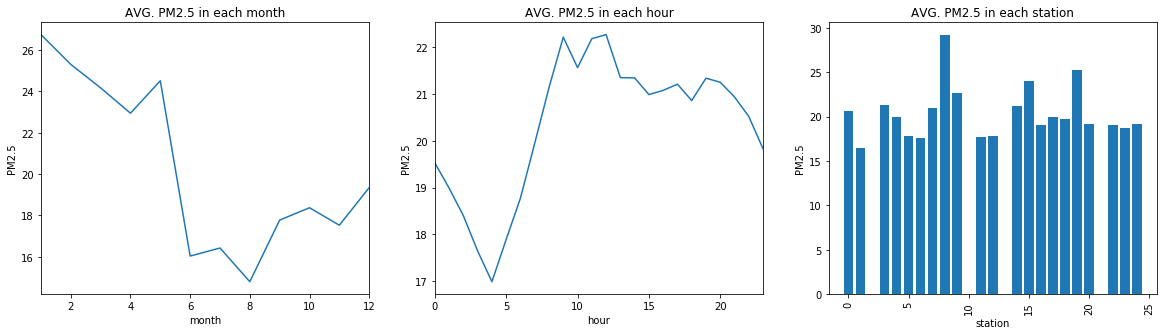

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('AVG. PM2.5 in each month')
plt.plot(data_as_frame.groupby('month').mean()['PM2.5'])
plt.xlim(1,12)
plt.xlabel('month')
plt.ylabel('PM2.5')

plt.subplot(1,3,2)
plt.title('AVG. PM2.5 in each hour')
plt.plot(data_as_frame.groupby('hour').mean()['PM2.5'])
plt.xlim(0,23)
plt.xlabel('hour')
plt.ylabel('PM2.5')

plt.subplot(1,3,3)
plt.title('AVG. PM2.5 in each station')
plt.bar(data_as_frame.groupby('station').mean().index,data_as_frame.groupby('station').mean()['PM2.5'])
plt.xticks(rotation='vertical')
plt.xlabel('station')
_=plt.ylabel('PM2.5')

In [61]:
continous_columns=['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL','RH', 'SO2', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR']
discrete_columns=['station','year','month','day','hour']

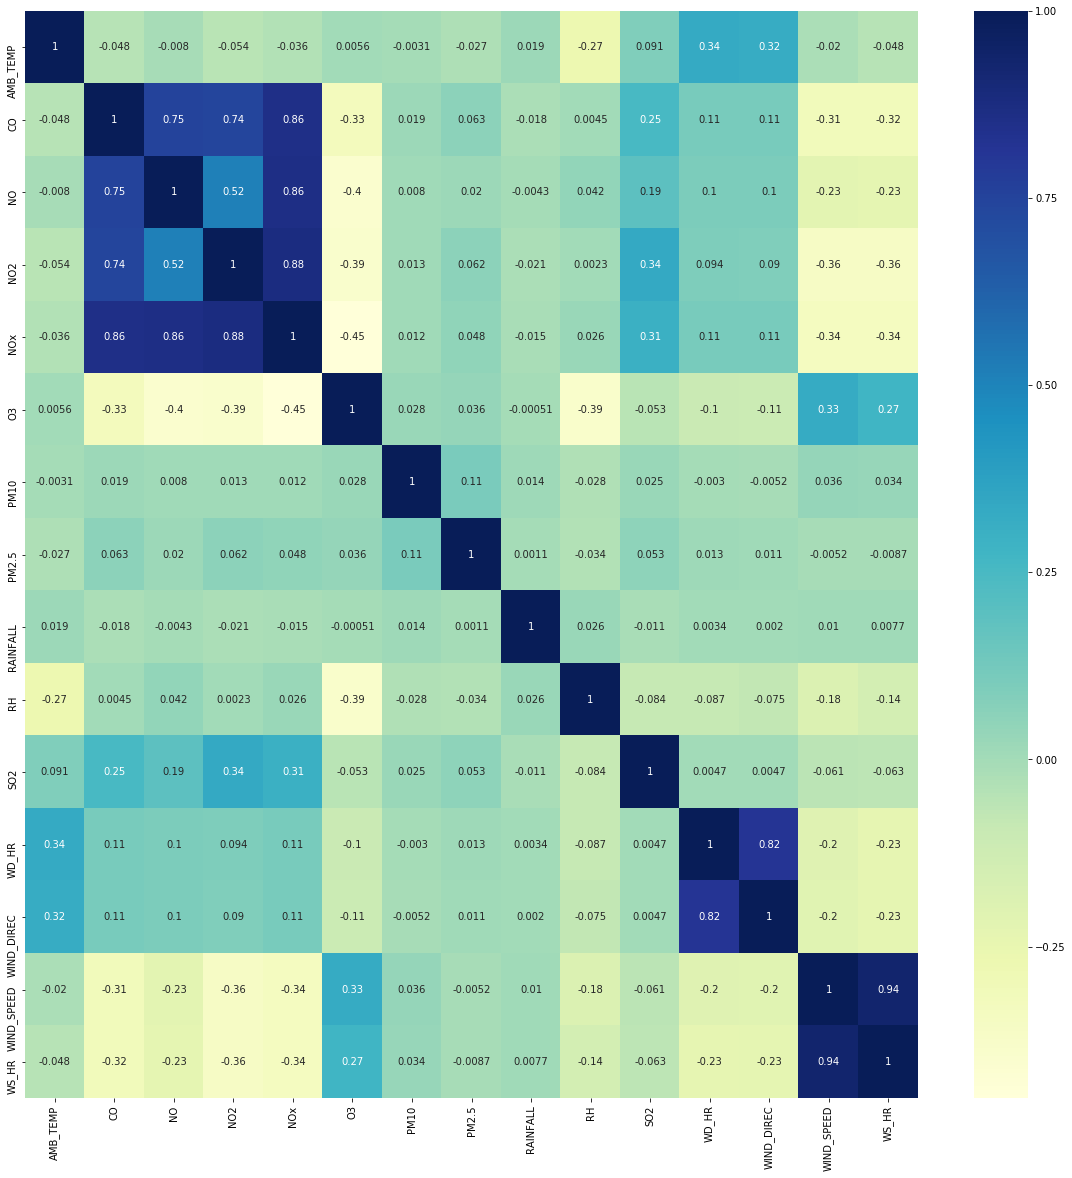

In [64]:
plt.figure(figsize=(20,20))
hm=sns.heatmap(data_as_frame[continous_columns].corr().values,annot=True,
               xticklabels=continous_columns,
               yticklabels=continous_columns,
               cmap='YlGnBu')

In [66]:
abs(data_as_frame[continous_columns].corr()['PM2.5']).sort_values(ascending=False)

PM2.5         1.000000
PM10          0.105224
CO            0.063188
NO2           0.061817
SO2           0.052612
NOx           0.047755
O3            0.035802
RH            0.033840
AMB_TEMP      0.026631
NO            0.020305
WD_HR         0.013161
WIND_DIREC    0.011264
WS_HR         0.008745
WIND_SPEED    0.005179
RAINFALL      0.001079
Name: PM2.5, dtype: float64

In [67]:
data_as_frame.head()

station  AMB_TEMP    CO   NO   NO2   NOx    O3   PM10  PM2.5  RAINFALL  \
0        0      16.0  0.79  1.2  16.0  17.0  37.0  177.0   78.0       0.0   
1        0      16.0  0.80  1.3  16.0  17.0  36.0  178.0   77.0       0.0   
2        0      16.0  0.71  1.0  13.0  14.0  38.0  163.0   72.0       0.0   
3        0      15.0  0.66  0.8  11.0  12.0  39.0  147.0   65.0       0.0   
4        0      15.0  0.53  0.6  10.0  11.0  38.0  131.0   56.0       0.0   

     RH   SO2  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR  year  month  day  hour  
0  57.0  12.0   69.0        69.0         4.7    4.2  2015      1    1     0  
1  57.0  11.0   67.0        65.0         4.0    4.0  2015      1    1     1  
2  57.0   8.0   63.0        53.0         3.7    3.5  2015      1    1     2  
3  58.0   6.5   63.0        63.0         4.1    3.3  2015      1    1     3  
4  58.0   5.5   69.0        67.0         3.0    3.1  2015      1    1     4

In [68]:
data_as_frame = data_as_frame.drop(['station','year','month','day','hour' ], axis=1)

In [69]:
data_as_frame.describe()

AMB_TEMP             CO             NO            NO2  \
count  180696.000000  180696.000000  180696.000000  180696.000000   
mean       23.538092       0.501201       6.033221      17.431975   
std         5.704638       0.372205      10.241035      10.837246   
min       -30.000000      -0.180000      -8.500000      -9.200000   
25%        19.000000       0.270000       1.400000       9.100000   
50%        24.000000       0.410000       2.600000      15.000000   
75%        28.000000       0.610000       6.000000      24.000000   
max        59.000000      34.540000     313.000000     166.000000   

                 NOx             O3           PM10          PM2.5  \
count  180696.000000  180696.000000  180696.000000  180696.000000   
mean       23.444943      28.329459      46.681443      20.333688   
std        18.377396      17.821053     183.666366      64.865297   
min        -3.600000      -8.500000    -396.000000     -57.000000   
25%        11.000000      14.000000      26.000000      10.000000   
50%        19.000000      28.000000      37.000000      16.000000   
75%        30.000000      40.000000      51.000000      25.000000   
max       370.000000     200.000000    9999.000000   10199.000000   

            RAINFALL             RH            SO2          WD_HR  \
count  180696.000000  180696.000000  180696.000000  180696.000000   
mean        0.390184      75.546738       3.365105     145.442760   
std         8.347260      12.770814       3.060877      86.498293   
min         0.000000       0.000000      -7.800000       0.000000   
25%         0.000000      67.000000       1.800000      76.000000   
50%         0.000000      77.000000       2.600000     112.000000   
75%         0.000000      85.000000       4.100000     220.000000   
max      1182.000000     100.000000     368.000000     360.000000   

          WIND_DIREC     WIND_SPEED          WS_HR  
count  180696.000000  180696.000000  180696.000000  
mean      145.570220       2.412477       1.986590  
std        87.615526       1.744651       1.725245  
min         0.000000       0.000000       0.000000  
25%        76.000000       1.200000       0.800000  
50%       112.000000       2.000000       1.500000  
75%       220.000000       3.100000       2.700000  
max       360.000000      50.000000      50.000000

In [70]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180696 entries, 0 to 218639
Data columns (total 15 columns):
AMB_TEMP      180696 non-null float64
CO            180696 non-null float64
NO            180696 non-null float64
NO2           180696 non-null float64
NOx           180696 non-null float64
O3            180696 non-null float64
PM10          180696 non-null float64
PM2.5         180696 non-null float64
RAINFALL      180696 non-null float64
RH            180696 non-null float64
SO2           180696 non-null float64
WD_HR         180696 non-null float64
WIND_DIREC    180696 non-null float64
WIND_SPEED    180696 non-null float64
WS_HR         180696 non-null float64
dtypes: float64(15)
memory usage: 22.1 MB


In [71]:
df_air = data_as_frame[0:125000]

In [73]:
df_air.columns

Index(['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL',
       'RH', 'SO2', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR'],
      dtype='object')

In [74]:
df_air.isna().sum()

AMB_TEMP      0
CO            0
NO            0
NO2           0
NOx           0
O3            0
PM10          0
PM2.5         0
RAINFALL      0
RH            0
SO2           0
WD_HR         0
WIND_DIREC    0
WIND_SPEED    0
WS_HR         0
dtype: int64

In [75]:
df_air.to_csv('output/air_data.csv',index=False)

# Data Cleaning and Feature Engineering completed

In [76]:
data = df_air[['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'SO2']]
data.head(10)

CO   NO   NO2   NOx    O3   PM10  PM2.5   SO2
0  0.79  1.2  16.0  17.0  37.0  177.0   78.0  12.0
1  0.80  1.3  16.0  17.0  36.0  178.0   77.0  11.0
2  0.71  1.0  13.0  14.0  38.0  163.0   72.0   8.0
3  0.66  0.8  11.0  12.0  39.0  147.0   65.0   6.5
4  0.53  0.6  10.0  11.0  38.0  131.0   56.0   5.5
5  0.50  0.8  11.0  12.0  37.0  112.0   46.0   5.7
6  0.57  1.4  18.0  19.0  29.0  103.0   45.0   5.8
7  0.61  2.3  17.0  20.0  27.0  104.0   42.0   6.5
8  0.59  2.9  15.0  18.0  29.0  111.0   45.0   6.8
9  0.60  4.1  16.0  20.0  29.0  111.0   46.0   5.9

In [77]:
temp_data = df_air.drop(columns=['CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'SO2'],axis=1)
temp_data.head()

AMB_TEMP  RAINFALL    RH  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR
0      16.0       0.0  57.0   69.0        69.0         4.7    4.2
1      16.0       0.0  57.0   67.0        65.0         4.0    4.0
2      16.0       0.0  57.0   63.0        53.0         3.7    3.5
3      15.0       0.0  58.0   63.0        63.0         4.1    3.3
4      15.0       0.0  58.0   69.0        67.0         3.0    3.1

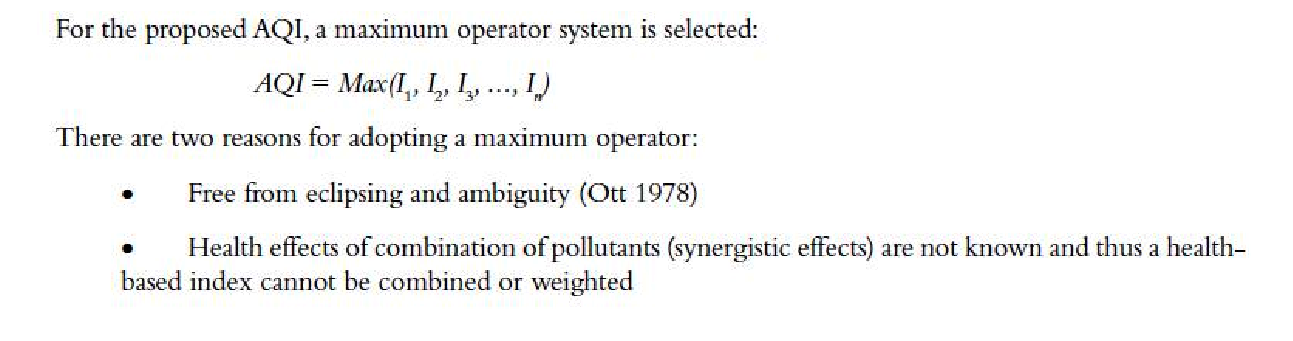

In [78]:
plt.figure(figsize=(20,10), dpi=80)
image = plt.imread('image/aqi.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [79]:
data['AQI']= data.max(axis=1)
data.head()

CO   NO   NO2   NOx    O3   PM10  PM2.5   SO2    AQI
0  0.79  1.2  16.0  17.0  37.0  177.0   78.0  12.0  177.0
1  0.80  1.3  16.0  17.0  36.0  178.0   77.0  11.0  178.0
2  0.71  1.0  13.0  14.0  38.0  163.0   72.0   8.0  163.0
3  0.66  0.8  11.0  12.0  39.0  147.0   65.0   6.5  147.0
4  0.53  0.6  10.0  11.0  38.0  131.0   56.0   5.5  131.0

In [80]:
aqi = data['AQI']

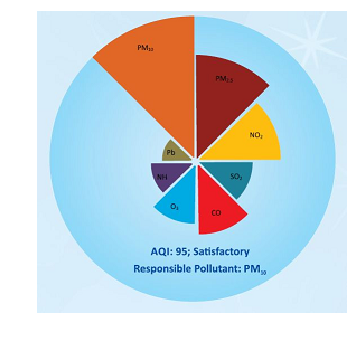

In [81]:
plt.figure(figsize=(12,5), dpi=80)
image = plt.imread('image/significance.png')
plt.axis('off')
plt.imshow(image)
plt.show()

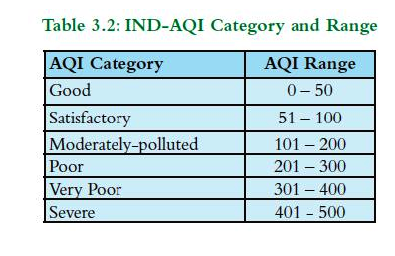

In [82]:
plt.figure(figsize=(12,5), dpi=60)
image = plt.imread('image/table.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [83]:
aqi[(aqi > 0) & (aqi <= 50)] = 0
aqi[(aqi > 50) & (aqi <= 100)] = 1
aqi[(aqi > 100) & (aqi <= 150)] = 2
aqi[(aqi > 150) & (aqi <= 200)] = 3
aqi[(aqi > 200) & (aqi <= 300)] = 4
aqi[(aqi > 300)] = 5

print(aqi.unique())

[3. 2. 1. 0. 4. 5.]


In [84]:
data['CLASS'] = data['AQI'].astype('int8')
data.drop(columns=['AQI'], axis= 1, inplace=True)
data.head(10)

CO   NO   NO2   NOx    O3   PM10  PM2.5   SO2  CLASS
0  0.79  1.2  16.0  17.0  37.0  177.0   78.0  12.0      3
1  0.80  1.3  16.0  17.0  36.0  178.0   77.0  11.0      3
2  0.71  1.0  13.0  14.0  38.0  163.0   72.0   8.0      3
3  0.66  0.8  11.0  12.0  39.0  147.0   65.0   6.5      2
4  0.53  0.6  10.0  11.0  38.0  131.0   56.0   5.5      2
5  0.50  0.8  11.0  12.0  37.0  112.0   46.0   5.7      2
6  0.57  1.4  18.0  19.0  29.0  103.0   45.0   5.8      2
7  0.61  2.3  17.0  20.0  27.0  104.0   42.0   6.5      2
8  0.59  2.9  15.0  18.0  29.0  111.0   45.0   6.8      2
9  0.60  4.1  16.0  20.0  29.0  111.0   46.0   5.9      2

In [85]:
temp_data.head()

AMB_TEMP  RAINFALL    RH  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR
0      16.0       0.0  57.0   69.0        69.0         4.7    4.2
1      16.0       0.0  57.0   67.0        65.0         4.0    4.0
2      16.0       0.0  57.0   63.0        53.0         3.7    3.5
3      15.0       0.0  58.0   63.0        63.0         4.1    3.3
4      15.0       0.0  58.0   69.0        67.0         3.0    3.1

In [86]:
data = temp_data.join(data)
data.head(10)

AMB_TEMP  RAINFALL    RH  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR    CO   NO  \
0      16.0       0.0  57.0   69.0        69.0         4.7    4.2  0.79  1.2   
1      16.0       0.0  57.0   67.0        65.0         4.0    4.0  0.80  1.3   
2      16.0       0.0  57.0   63.0        53.0         3.7    3.5  0.71  1.0   
3      15.0       0.0  58.0   63.0        63.0         4.1    3.3  0.66  0.8   
4      15.0       0.0  58.0   69.0        67.0         3.0    3.1  0.53  0.6   
5      14.0       0.0  57.0   68.0        62.0         2.9    3.3  0.50  0.8   
6      14.0       0.0  57.0   74.0        70.0         3.6    2.2  0.57  1.4   
7      14.0       0.0  56.0   66.0        72.0         3.1    3.0  0.61  2.3   
8      14.0       0.0  53.0   71.0        73.0         2.8    3.3  0.59  2.9   
9      14.0       0.0  50.0   73.0        68.0         3.6    3.2  0.60  4.1   

    NO2   NOx    O3   PM10  PM2.5   SO2  CLASS  
0  16.0  17.0  37.0  177.0   78.0  12.0      3  
1  16.0  17.0  36.0  178.0   77.0  11.0      3  
2  13.0  14.0  38.0  163.0   72.0   8.0      3  
3  11.0  12.0  39.0  147.0   65.0   6.5      2  
4  10.0  11.0  38.0  131.0   56.0   5.5      2  
5  11.0  12.0  37.0  112.0   46.0   5.7      2  
6  18.0  19.0  29.0  103.0   45.0   5.8      2  
7  17.0  20.0  27.0  104.0   42.0   6.5      2  
8  15.0  18.0  29.0  111.0   45.0   6.8      2  
9  16.0  20.0  29.0  111.0   46.0   5.9      2

In [87]:
# save the labeled data
data.to_csv('output/labeled_data.csv',index=False)

In [88]:
data.groupby('CLASS').describe()

AMB_TEMP                                                          CO  \
         count       mean       std   min   25%   50%   75%   max    count   
CLASS                                                                        
0      83127.0  23.793491  5.593550 -30.0  19.0  25.0  28.0  59.0  83127.0   
1      37855.0  22.985244  5.829361   0.0  18.0  23.0  27.0  56.0  37855.0   
2       3615.0  18.899889  5.199396   9.5  15.0  18.0  22.0  37.0   3615.0   
3        223.0  18.967265  4.162386   9.7  16.0  18.0  22.0  30.0    223.0   
4         33.0  19.606061  4.286165  13.0  17.0  19.0  22.0  29.0     33.0   
5        147.0  23.271429  8.321527 -30.0  18.0  26.0  29.0  34.0    147.0   

                 ...  WIND_SPEED          WS_HR                                \
           mean  ...         75%   max    count      mean       std  min  25%   
CLASS            ...                                                            
0      0.381928  ...        3.10  50.0  83127.0  2.055691  1.752627  0.0  0.9   
1      0.531442  ...        3.20  50.0  37855.0  2.080505  1.813829  0.0  0.8   
2      0.765339  ...        3.90  17.0   3615.0  2.542158  2.235049  0.0  0.8   
3      0.947309  ...        6.40  21.0    223.0  3.426906  3.159683  0.0  0.8   
4      1.770909  ...        3.30   6.1     33.0  1.824242  1.679291  0.1  0.4   
5      0.594966  ...        5.95  11.0    147.0  3.265986  2.920698  0.0  0.9   

                        
       50%   75%   max  
CLASS                   
0      1.6  2.80  50.0  
1      1.6  2.80  50.0  
2      1.8  3.60  17.0  
3      2.5  5.60  19.0  
4      1.1  3.00   5.6  
5      2.2  5.75  10.0  

[6 rows x 120 columns]

In [90]:
x = data.drop('CLASS',axis =1)
y = data['CLASS']

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [92]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(87500, 15) (87500,) (37500, 15) (37500,)


In [93]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [94]:
#print the shape of the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(87500, 15) (87500, 1) (37500, 15) (37500, 1)


In [95]:
x_train.head()

AMB_TEMP  RAINFALL    RH  WD_HR  WIND_DIREC  WIND_SPEED  WS_HR    CO  \
39938       27.0       0.0  76.0  230.0       228.0         3.2    3.0  0.20   
110351      26.0       0.0  87.0   84.0        74.0         0.8    0.7  0.76   
15857       25.0       0.0  80.0  261.0       263.0         0.6    0.1  0.86   
144261      32.0       0.0  63.0  279.0       279.0         1.3    1.1  0.73   
125406      23.0       0.0  90.0  157.0       157.0         0.5    0.6  1.30   

          NO   NO2   NOx    O3  PM10  PM2.5   SO2  
39938    1.0  14.0  15.0   2.2  40.0   12.0   6.2  
110351  28.0  20.0  48.0   2.1  10.0    9.0   2.1  
15857    4.2  29.0  33.0  12.0  48.0   20.0   2.1  
144261   2.5  22.0  25.0  14.0  43.0   18.0   4.9  
125406  46.0  25.0  71.0   2.0  64.0   35.0  12.0

In [96]:
y_train.head()

CLASS
39938       0
110351      0
15857       0
144261      0
125406      1

In [97]:
train_data = pd.concat([x_train, y_train], axis=1, join='inner')
test_data = pd.concat([x_test, y_test], axis=1, join='inner')

In [98]:
train_data.to_csv('output/train.csv',index_label='Index')
test_data.to_csv('output/test.csv',index_label='Index')

-----------------------------------------------------------------------------------
Next to be followed:
    1. Model Construction
    2. Model Training
    3. Model Evaluation

---------------------------------------------------------------------------------------

In [157]:
model = RandomForestClassifier(n_estimators= 100)

In [158]:
# train the model
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
# validate model using test-set
y_pred = model.predict(x_test)

In [160]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int8)

In [161]:
# Class Label
class_names = ['Good', 'Satisfactory', 'Moderately', 'Poor', 'Very-Poor', 'Severe']

In [162]:
print(classification_report(y_test, y_pred, target_names=class_label))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     24864
Satisfactory       1.00      1.00      1.00     11416
  Moderately       0.99      1.00      0.99      1100
        Poor       0.93      0.90      0.91        69
   Very-Poor       1.00      0.40      0.57        10
      Severe       1.00      0.76      0.86        41

   micro avg       1.00      1.00      1.00     37500
   macro avg       0.99      0.84      0.89     37500
weighted avg       1.00      1.00      1.00     37500



In [163]:
acc = accuracy_score(y_test, y_pred)*100

print("Accuracy in percentage : %f"%acc)

Accuracy in percentage : 99.906667


In [165]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = class_label
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
Normalized confusion matrix


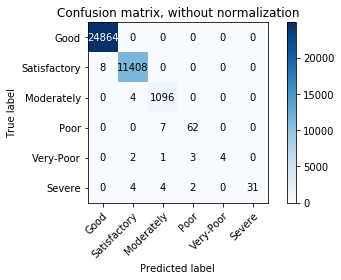

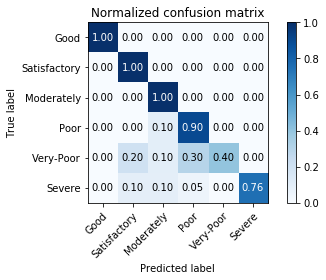

In [166]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()